<a href="https://colab.research.google.com/github/diogenesjusto/FIAP/blob/master/MBAIA/8DTSR/8DTSR_aula1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
# Carga de bibliotecas
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [8]:
# Carga de dados
df = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/dados/mtcars.csv")

<Axes: xlabel='wt', ylabel='mpg'>

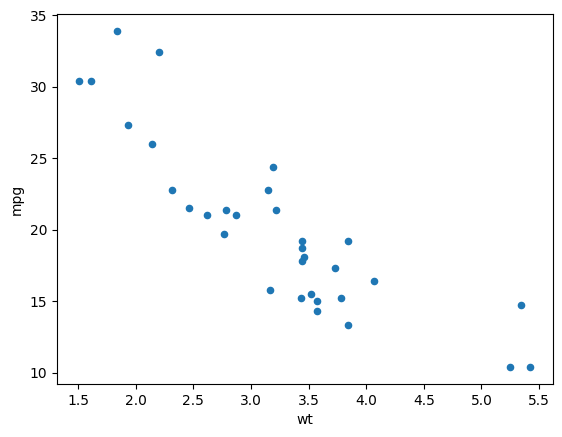

In [6]:
# Gráfico de dispersão
df.plot.scatter(x='wt', y='mpg')

In [53]:
# Execução do K-Means
k = KMeans(n_clusters=8, random_state=2).fit(df[['wt', 'mpg']])

<Axes: xlabel='wt', ylabel='mpg'>

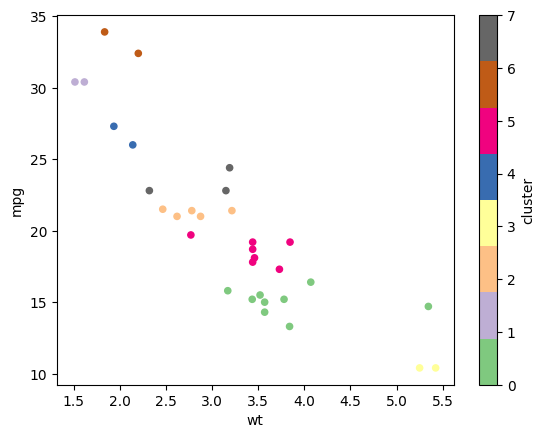

In [54]:
# Visualização dos clusters
df['cluster'] = k.labels_
df.plot.scatter(x='wt', y='mpg', c='cluster', colormap='Accent')

<Axes: xlabel='wt_t', ylabel='mpg'>

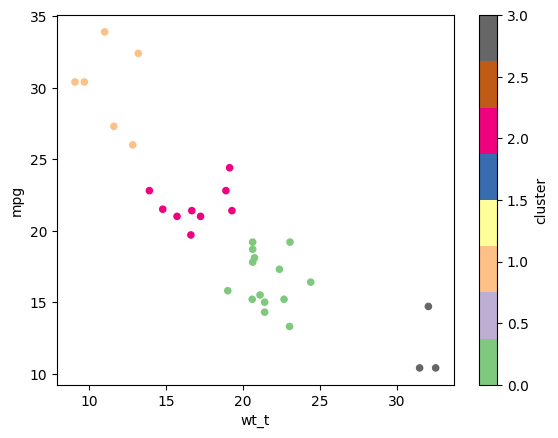

In [64]:
# 1.a ideia - colocar ambas variáveis na mesma ordem de grandeza
# ajuste de escala "manual"
df['wt_t'] = df['wt'] * 6

# Execução do K-Means
k = KMeans(n_clusters=4, random_state=2).fit(df[['wt_t', 'mpg']])
df['cluster'] = k.labels_
df.plot.scatter(x='wt_t', y='mpg', c='cluster', colormap='Accent')

<Axes: xlabel='wt_01', ylabel='mpg_01'>

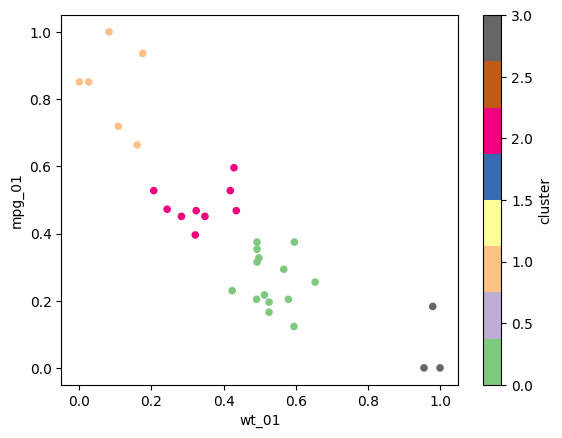

In [65]:
# 2.a ideia - "padronizar" escalas de variáveis
# normalização - ajustes de escala (tipos)
scaler = MinMaxScaler(feature_range=(0,1))
df['wt_01'] = scaler.fit_transform(df[['wt']])
df['mpg_01'] = scaler.fit_transform(df[['mpg']])

# Execução do K-Means
k = KMeans(n_clusters=4, random_state=2).fit(df[['wt_01', 'mpg_01']])
df['cluster'] = k.labels_
df.plot.scatter(x='wt_01', y='mpg_01', c='cluster', colormap='Accent')

In [66]:
df

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,cluster,wt_t,wt_01,mpg_01
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,2,15.720,0.283048,0.451064
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,2,17.250,0.348249,0.451064
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,2,13.920,0.206341,0.527660
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,2,19.290,0.435183,0.468085
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,0,20.640,0.492713,0.353191
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,0,20.760,0.497827,0.327660
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0,21.420,0.525952,0.165957
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,2,19.140,0.428791,0.595745
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,2,18.900,0.418563,0.527660
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,0,20.640,0.492713,0.374468
